In [1]:
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [2]:
pathdf = 'Stress-Lysis.csv'  # Path of the file
Yvar = 'Stress_Level'  # Target variable to predict
aggtype = ['mean', 'std']
palette = 'flare'
seed = 49
test_size = 0.30  # Percentage size of the test set


In [3]:
df = pd.read_csv(pathdf)

In [4]:
print(df.head())
print("Dataset Shape:", df.shape)
print(df.describe().T)
print("Missing Values:\n", df.isna().sum())
print(df.info())


   Humidity  Temperature  Step_count  Stress_Level
0     21.33        90.33         123             1
1     21.41        90.41          93             1
2     27.12        96.12         196             2
3     27.64        96.64         177             2
4     10.87        79.87          87             0
Dataset Shape: (2001, 4)
               count        mean        std   min   25%    50%    75%    max
Humidity      2001.0   20.000000   5.777833  10.0  15.0   20.0   25.0   30.0
Temperature   2001.0   89.000000   5.777833  79.0  84.0   89.0   94.0   99.0
Step_count    2001.0  100.141429  58.182948   0.0  50.0  101.0  150.0  200.0
Stress_Level  2001.0    1.104448   0.771094   0.0   0.0    1.0    2.0    2.0
Missing Values:
 Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------

<Axes: >

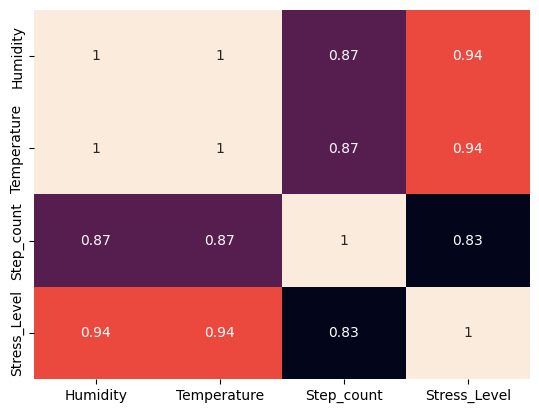

In [5]:
sns.heatmap(df.corr(), cbar=False, annot=True)

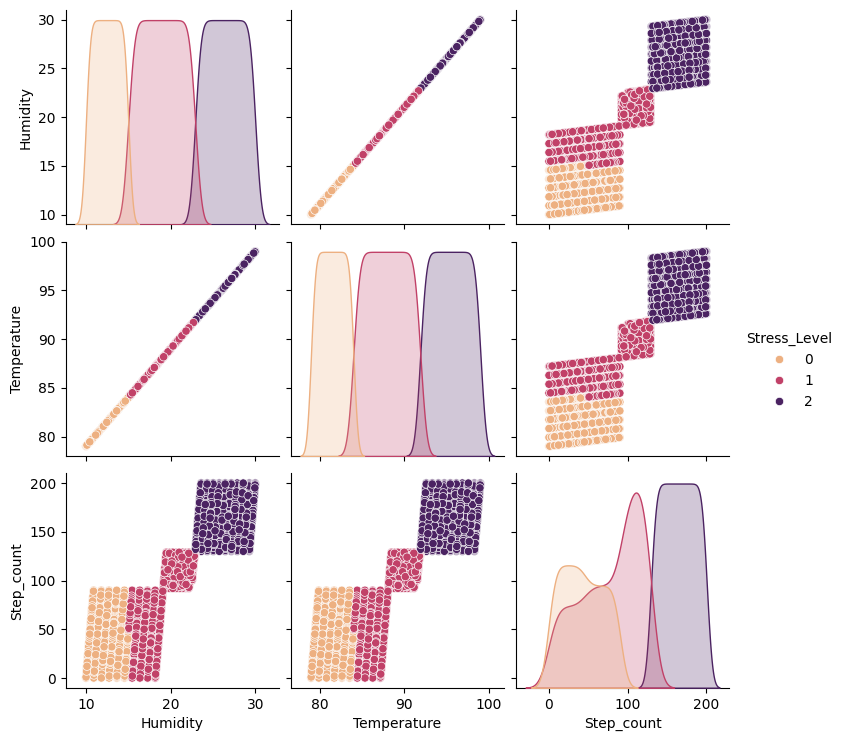

In [6]:
sns.pairplot(df, hue=Yvar, palette=palette)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(Yvar, axis=1),
    df[Yvar],
    test_size=test_size,
    stratify=df[Yvar],
    random_state=seed
)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
pipeline = Pipeline(steps=[('RFE', rfe), ('KNN', knn)])

In [9]:
# Hyperparameter grid
param_grid = {
    'RFE__n_features_to_select': [2, 3, 4, 5],
    'KNN__n_neighbors': [3, 5, 7, 9]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Set Accuracy with Best Model: {test_accuracy:.2f}")


Best Parameters: {'KNN__n_neighbors': 3, 'RFE__n_features_to_select': 2}
Best Cross-Validation Accuracy: 0.9921428571428571
Test Set Accuracy with Best Model: 0.99


In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('RFE',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=2)),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [11]:

accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [12]:
model_path = "stress_detection_model.pkl"
joblib.dump(pipeline, model_path)
print(f"Model saved successfully at {model_path}!")

Model saved successfully at stress_detection_model.pkl!


In [13]:

def get_user_input(feature_names):
    print("\nEnter values for the following features:")
    user_data = {}
    for feature in feature_names:
        value = float(input(f"{feature}: "))  # Convert input to float
        user_data[feature] = value
    return pd.DataFrame([user_data])


In [14]:
def load_and_predict(user_input): # add user input as parameter
    # Load the saved model
    model = joblib.load(model_path)
    print("Model loaded successfully!")
    prediction = model.predict(user_input) # call prediction here after model load
    stress_level = "Stressed" if prediction[0] == 1 else "Not Stressed"
    print(f"\nPredicted Stress Level: {stress_level}")


In [15]:
feature_names = list(df.drop(Yvar, axis=1).columns)

In [16]:
user_input = get_user_input(feature_names)


Enter values for the following features:
Humidity: 30
Temperature: 45
Step_count: 400


In [17]:
load_and_predict(user_input)

Model loaded successfully!

Predicted Stress Level: Not Stressed
